## Importing dependencies

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Data collection and Processing

In [105]:
# Loading data from csv file to pandas dataframe
data = pd.read_csv('car data.csv')

In [106]:
# Inspecting the data
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [107]:
# checking the number of rows and columns
data.shape

(301, 9)

In [108]:
# getting some information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [109]:
# Checking the number of missing values
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [110]:
# Checking the distribution of categorical data
print(data.Fuel_Type.value_counts())
print("\n", data.Seller_Type.value_counts())
print("\n", data.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

 Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

 Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [111]:
# Encoding "Fuel_Type" column
data.replace({'Fuel_Type': {'Petrol' : 0, 'Diesel' : 1, 'CNG' : 2}}, inplace= True)

# Encoding "Seller_Type" column
data.replace({'Seller_Type' : {'Dealer' : 0, 'Individual' : 1}}, inplace= True)

# Encoding "Transmission" column
data.replace({'Transmission' : {'Manual' : 0, 'Automatic' : 1}}, inplace= True)

In [112]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


## Splitting the data and target

In [113]:
x = data.drop(['Car_Name', 'Selling_Price'], axis= 1)
y = data['Selling_Price']

In [114]:
x

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [115]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

## Splitting training and testing data

In [130]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.1, random_state= 1)

## Model Training

### Linear Regressor

In [131]:
# Loading the linear regressor model
model = LinearRegression()

In [132]:
model.fit(x_train, y_train)

LinearRegression()

In [133]:
model_predictions = model.predict(x_test)

#### Model evaluation

In [134]:
# Testing on training data
model.score(x_train, y_train)

0.8886588257606465

In [135]:
# testing on test data
model.score(x_test, y_test)

0.3931106765722139

### Visualize the actual and predicted prices

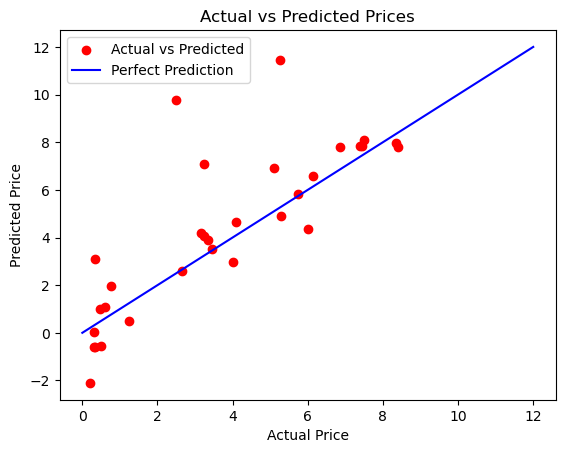

In [136]:
import matplotlib.pyplot as plt

# Assuming y_test and model_predictions are arrays or lists containing actual and predicted prices

plt.scatter(y_test, model_predictions, color='red', label='Actual vs Predicted')
plt.plot([0, 12], [0, 12], color='blue', label='Perfect Prediction')

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")

plt.legend()  # Add legend to distinguish between actual vs predicted and perfect prediction lines
plt.show()


## Building a Preductive system

In [137]:
cust_data = (2016, 7.600, 17000, 0, 0, 0, 0)

In [138]:
cust_data = np.asarray(cust_data)
cust_data = cust_data.reshape(1, -1)

In [139]:
cust_data

array([[2.016e+03, 7.600e+00, 1.700e+04, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00]])

In [140]:
cust_predictions = model.predict(cust_data)

/Users/jathinnarayan/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [141]:
cust_predictions

array([5.6095907])